# Préparation initiale dataset

## Récupération du dataset et filtres de données

In [1]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere

In [2]:
pd.options.display.max_rows = 100

In [3]:
data_init = pd.read_csv("../CSV-Excels/P6_datasets/flipkart_com-ecommerce_sample_1050.csv")
print(data_init.shape)

(1050, 15)


In [4]:
data_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [5]:
data_init.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [6]:
df = data_init[["product_category_tree", "image", "description"]]
df

,product_category_tree,image,description
0,"[""Home Furnishing >> Curtains & Accessories >>...",55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...
1,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...
2,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...
3,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...
4,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...
...,...,...,...
1045,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",958f54f4c46b53c8a0a9b8167d9140bc.jpg,Oren Empower Extra Large Self Adhesive Sticker...
1046,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",fd6cbcc22efb6b761bd564c28928483c.jpg,Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",5912e037d12774bb73a2048f35a00009.jpg,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Buy Wallmantra Medium Vinyl Sticker Sticker fo...


In [8]:
# classification non supervisée d'abord, comme dans le notebook

In [13]:
# Définir le nombre de catégories

nb_cat = df['product_category_tree'].apply(lambda x: x.count('>>'))
max_nb_cat = nb_cat.max() + 1
max_nb_cat

7

In [14]:
# Créer des colonnes pour chaque niveau de catégorie

def str_cleaning(ind, my_str, name_level_cols):
    my_str = my_str.replace("[\"", "").replace("\"]", "")
    tab_str = my_str.split(">>")
    size_tab_str = len(tab_str)
    tup_str = tuple([tab_str[i].strip() if i<size_tab_str else "" \
                     for i in np.arange(max_nb_cat) ])
    return tup_str

name_level_cols = ['cat_level_'+str(i) for i in np.arange(max_nb_cat)]
ser_tuple = df['product_category_tree']\
    .apply(lambda s: str_cleaning(s.index, s, name_level_cols))
df_cat_level = pd.DataFrame([[a,'/'.join([a,b]),'/'.join([a,b,c]),
                              '/'.join([a,b,c,d]),'/'.join([a,b,c,d,e]),
                              '/'.join([a,b,c,d,e,f]), '/'.join([a,b,c,d,e,f,g])] \
                             for a,b,c,d,e,f, g in ser_tuple.values],
                            columns=name_level_cols, index=df.index)

In [15]:
display(df_cat_level.nunique(), df_cat_level.sample(3))

cat_level_0      7
cat_level_1     62
cat_level_2    243
cat_level_3    460
cat_level_4    596
cat_level_5    633
cat_level_6    642
dtype: int64

,cat_level_0,cat_level_1,cat_level_2,cat_level_3,cat_level_4,cat_level_5,cat_level_6
965,Beauty and Personal Care,Beauty and Personal Care/Body and Skin Care,Beauty and Personal Care/Body and Skin Care/Li...,Beauty and Personal Care/Body and Skin Care/Li...,Beauty and Personal Care/Body and Skin Care/Li...,Beauty and Personal Care/Body and Skin Care/Li...,Beauty and Personal Care/Body and Skin Care/Li...
420,Computers,Computers/Network Components,Computers/Network Components/Routers,Computers/Network Components/Routers/D-Link Ro...,Computers/Network Components/Routers/D-Link Ro...,Computers/Network Components/Routers/D-Link Ro...,Computers/Network Components/Routers/D-Link Ro...
203,Home Decor & Festive Needs,Home Decor & Festive Needs/Showpieces,Home Decor & Festive Needs/Showpieces/Purpledi...,Home Decor & Festive Needs/Showpieces/Purpledi...,Home Decor & Festive Needs/Showpieces/Purpledi...,Home Decor & Festive Needs/Showpieces/Purpledi...,Home Decor & Festive Needs/Showpieces/Purpledi...


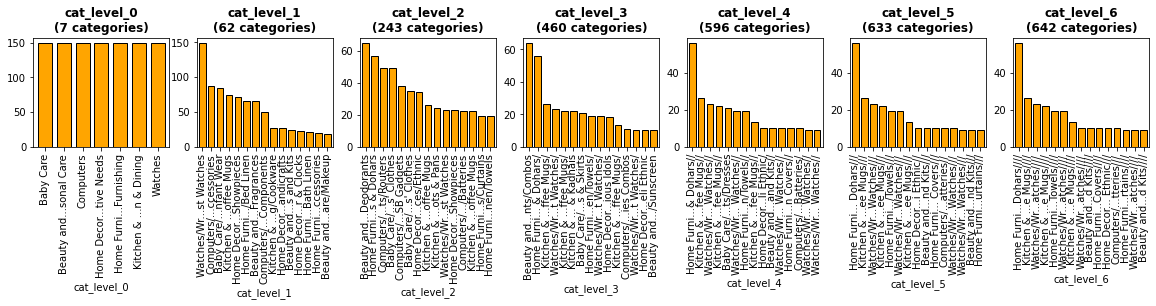

In [17]:
shorten_label = 10
n_first = 15
fig = plt.figure(figsize=(20,2))
for i, col in enumerate(df_cat_level.columns,1):
    ax = fig.add_subplot(1,len(df_cat_level.columns), i)
    ser = df_cat_level.groupby(col).size().sort_values(ascending=False)
    ser[0:n_first].plot.bar(width=0.75, color='orange', ec='k', ax=ax)
    # shorten the labels
    thr = int(shorten_label)
    lab_x = [item.get_text() for item in ax.get_xticklabels()]
    short_lab_x = [s[:thr]+'...'+s[-thr:] if len(s)>thr else s for s in lab_x]
    ax.axes.set_xticklabels(short_lab_x)
    # set title
    ax.set_title(col+f'\n({ser.shape[0]} categories)', fontweight='bold')

In [18]:
df_cat_level['cat_level_0'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [19]:
display(df_cat_level['cat_level_0'].value_counts())

Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: cat_level_0, dtype: int64

In [20]:
display(df_cat_level['cat_level_1'].value_counts())

Watches/Wrist Watches                                         149
Computers/Laptop Accessories                                   87
Baby Care/Infant Wear                                          84
Kitchen & Dining/Coffee Mugs                                   74
Home Decor & Festive Needs/Showpieces                          71
Home Furnishing/Bed Linen                                      65
Beauty and Personal Care/Fragrances                            65
Computers/Network Components                                   49
Kitchen & Dining/Cookware                                      27
Home Decor & Festive Needs/Table Decor & Handicrafts           27
Beauty and Personal Care/Combos and Kits                       24
Home Decor & Festive Needs/Wall Decor & Clocks                 22
Home Furnishing/Bath Linen                                     21
Home Furnishing/Curtains & Accessories                         19
Beauty and Personal Care/Makeup                                18
Baby Care/

In [21]:
df["category"] = df_cat_level['cat_level_0']

/tmp/ipykernel_8461/3889362774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["category"] = df_cat_level['cat_level_0']


In [22]:
df.category = pd.Categorical(df.category)
df["category_code"] = df.category.cat.codes

/home/kilian/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/tmp/ipykernel_8461/1099883615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["category_code"] = df.category.cat.codes


In [23]:
df

,product_category_tree,image,description,category,category_code
0,"[""Home Furnishing >> Curtains & Accessories >>...",55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4
1,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
3,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4
4,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4
...,...,...,...,...,...
1045,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",958f54f4c46b53c8a0a9b8167d9140bc.jpg,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0
1046,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",fd6cbcc22efb6b761bd564c28928483c.jpg,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0
1047,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",5912e037d12774bb73a2048f35a00009.jpg,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0
1048,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0


In [24]:
data_text = df[["description", "category", "category_code"]]
data_images = df[["image", "category", "category_code"]]

# Nettoyage du texte

- deux approches de type “bag-of-words”, comptage simple de mots et Tf-idf ;
- une approche de type word/sentence embedding classique avec Word2Vec (ou Glove ou FastText) ;
- une approche de type word/sentence embedding avec BERT ;
- une approche de type word/sentence embedding avec USE (Universal Sentence Encoder)

In [25]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)   
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

data_text['sentence_bow'] = data_text['description'].apply(lambda x : transform_bow_fct(x))
data_text['sentence_bow_lem'] = data_text['description'].apply(lambda x : transform_bow_lem_fct(x))
data_text['sentence_dl'] = data_text['description'].apply(lambda x : transform_dl_fct(x))

[nltk_data] Downloading package wordnet to /home/kilian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/tmp/ipykernel_8461/217274045.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['sentence_bow'] = data_text['description'].apply(lambda x : transform_bow_fct(x))


In [63]:
print('Exemple description brute contentant', len(data_text.iloc[8,0]), 'tokens')
data_text.iloc[8,0]

Exemple description brute contentant 410 tokens


"Alfajr WY16B Youth Digital Watch  - For Men, Boys - Buy Alfajr WY16B Youth Digital Watch  - For Men, Boys  WY16B Online at Rs.4995 in India Only at Flipkart.com. Azan Times ( For All Cities Around The World ), Prayer Reminders, Qibla Direction, Hijri And Gregorian Calnedars, Qur'An Bookmark, Daily Alrams - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!"

In [62]:
print('Exemple description tokenisée et lemmatizée contentant', len(data_text.iloc[8,4]), 'tokens')
data_text.iloc[8,4]
# data_text

Exemple description tokenisée et lemmatizée contentant 359 tokens


"alfajr wy16b youth digital watch for men boy buy alfajr wy16b youth digital watch for men boy wy16b online rs.4995 india only flipkart.com azan time for all city around the world prayer reminder qibla direction hijri and gregorian calnedars qur'an bookmark daily alrams great discount only genuine product day replacement guarantee free shipping cash delivery"

In [22]:
data_text['length_bow'] = data_text['sentence_bow'].apply(lambda x : len(word_tokenize(x)))
print("max length bow : ", data_text['length_bow'].max())
data_text['length_dl'] = data_text['sentence_dl'].apply(lambda x : len(word_tokenize(x)))
print("max length dl : ", data_text['length_dl'].max())

max length bow :  379
max length dl :  632


In [39]:
data_text

,description,category,category_code,sentence_bow,sentence_bow_lem,sentence_dl
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4,key features elegance polyester multicolor abs...,key feature elegance polyester multicolor abst...,key features of elegance polyester multicolor ...
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0,specifications sathiyas cotton bath towel bath...,specification sathiyas cotton bath towel bath ...,specifications of sathiyas cotton bath towel (...
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0,key features eurospa cotton terry face towel s...,key feature eurospa cotton terry face towel se...,key features of eurospa cotton terry face towe...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4,key features santosh royal fashion cotton prin...,key feature santosh royal fashion cotton print...,key features of santosh royal fashion cotton p...
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4,key features jaipur print cotton floral king s...,key feature jaipur print cotton floral king si...,key features of jaipur print cotton floral kin...
...,...,...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0,oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker...
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0,wallmantra large vinyl sticker sticker pack pr...,wallmantra large vinyl sticker sticker pack pr...,wallmantra large vinyl sticker sticker ( pack ...
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0,buy uberlyfe extra large pigmented polyvinyl f...,buy uberlyfe extra large pigmented polyvinyl f...,buy uberlyfe extra large pigmented polyvinyl f...
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0,buy wallmantra medium vinyl sticker sticker rs...,buy wallmantra medium vinyl sticker sticker rs...,buy wallmantra medium vinyl sticker sticker fo...


In [56]:
categories_array = data_text.category.unique()

# Fonctions communes

In [52]:
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels = max_nb_cat
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(data_text.category_code, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=categories_array, loc="best", title="Categorie")
    plt.title('Représentation des articles par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des articles par clusters')
    
    plt.show()
    print("ARI : ", ARI)

# Bag of word - Tf-idf

## Préparation sentences

In [53]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'sentence_bow_lem'
cv_fit = cvect.fit(data_text[feat])
ctf_fit = ctf.fit(data_text[feat])

cv_transform = cvect.transform(data_text[feat])  
ctf_transform = ctf.transform(data_text[feat])  

## Exécution des modèles

In [54]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform)

CountVectorizer : 
-----------------
ARI :  0.3919 time :  5.0

Tf-idf : 
--------
ARI :  0.4522 time :  4.0


## Graphiques

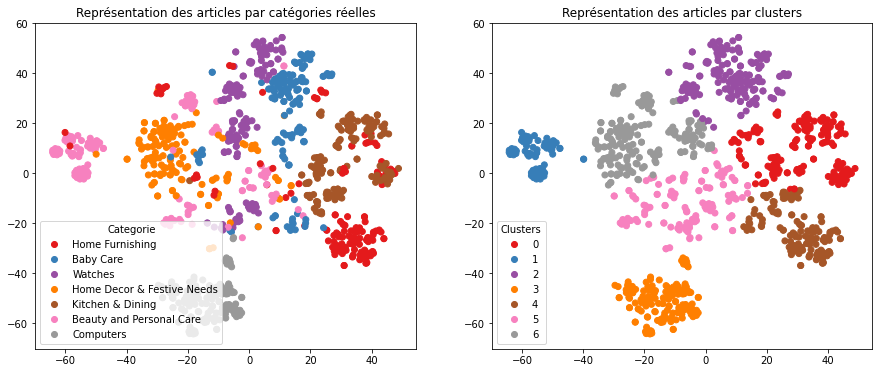

ARI :  0.4522


In [57]:
 TSNE_visu_fct(X_tsne, data_text.category_code, labels, ARI)

# Word2Vec

In [58]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

2023-04-16 14:33:26.533407: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-16 14:33:31.323457: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-16 14:33:31.323521: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-16 14:33:39.279964: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

## Création du modèle Word2Vec

In [59]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences

# A REVOIR
sentences = data_text['sentence_bow_lem'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [61]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 4712
Word2Vec trained


In [64]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4713


## Création de la matrice d'embedding

In [65]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4713, 300)


## Création du modèle d'embedding

In [66]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

2023-04-16 14:35:07.075666: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-16 14:35:07.075726: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-16 14:35:07.075787: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kilian-NP50DE-DB): /proc/driver/nvidia/version does not exist
2023-04-16 14:35:07.088276: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding (Embedding)       (None, 24, 300)           1413900   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 1,413,900
Trainable params: 1,413,900
Non-trainable params: 0
_________________________________________________________________


## Execution du modèle

In [67]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 1s 2ms/step


(1050, 300)

In [68]:
ARI, X_tsne, labels = ARI_fct(embeddings)

ARI :  0.2163 time :  4.0


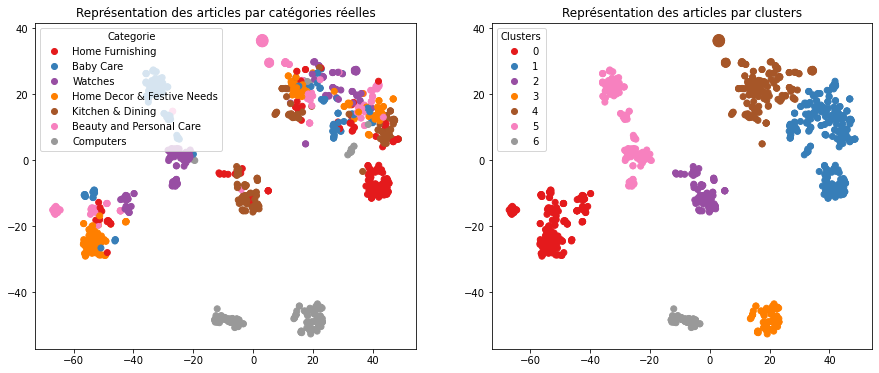

ARI :  0.2163


In [69]:
TSNE_visu_fct(X_tsne, data_text.category_code, labels, ARI)

# BERT

In [70]:
# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

/home/kilian/anaconda3/lib/python3.9/site-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(


In [71]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.11.0
2.11.0
Num GPUs Available:  0
True


## Fonctions communes 

In [72]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

## BERT HuggingFace

In [75]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = data_text['sentence_dl'].to_list()

In [76]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 0s 326ms/step
temps traitement :  45.0


In [77]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.3281 time :  4.0


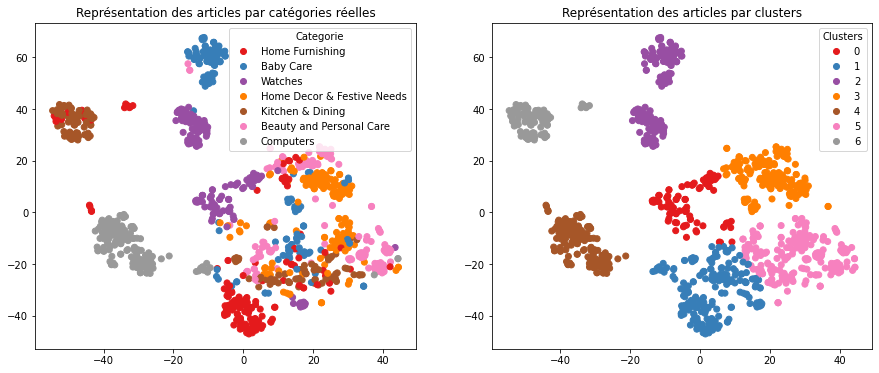

ARI :  0.3281


In [78]:
TSNE_visu_fct(X_tsne, data_text.category_code, labels, ARI)

1/1 [==============================] - 0s 348ms/step
temps traitement :  44.0
ARI :  0.3257 time :  5.0


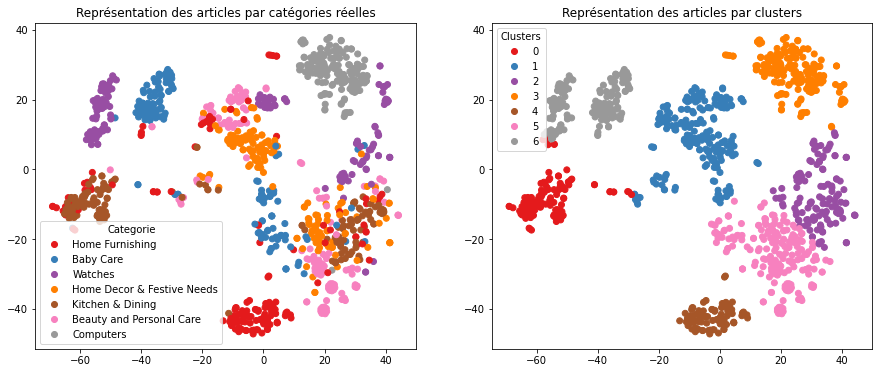

ARI :  0.3257


In [79]:
max_length = 64
batch_size = 10
model_type = 'roberta-base'
model = TFAutoModel.from_pretrained(model_type)
sentences = data_text['sentence_dl'].to_list()

# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

ARI, X_tsne, labels = ARI_fct(features_bert)

TSNE_visu_fct(X_tsne, data_text.category_code, labels, ARI)

## BERT hub Tensorflow

In [80]:
import tensorflow_hub as hub
import tensorflow_text 

# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [81]:
sentences = data_text['sentence_dl'].to_list()

In [82]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

temps traitement :  42.0


In [83]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.3163 time :  4.0


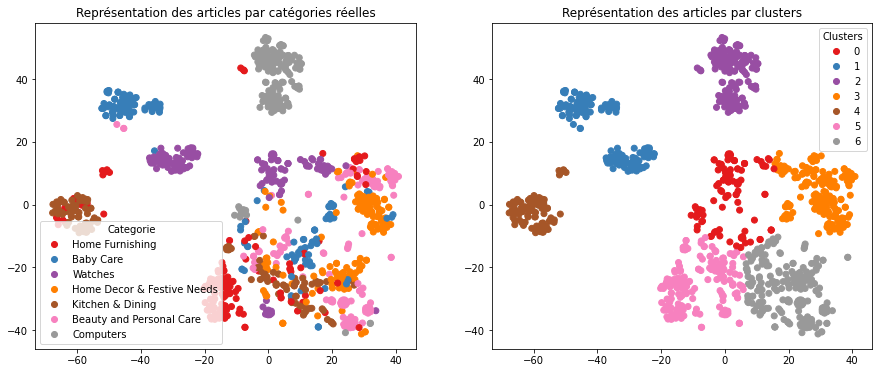

ARI :  0.3163


In [84]:
TSNE_visu_fct(X_tsne, data_text.category_code, labels, ARI)

# USE - Universal Sentence Encoder (RNN)

In [85]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.11.0
2.11.0
Num GPUs Available:  0
True


In [86]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [87]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [88]:
batch_size = 10
sentences = data_text['sentence_dl'].to_list()

In [89]:
features_USE = feature_USE_fct(sentences, batch_size)

In [90]:
ARI, X_tsne, labels = ARI_fct(features_USE)

ARI :  0.4314 time :  4.0


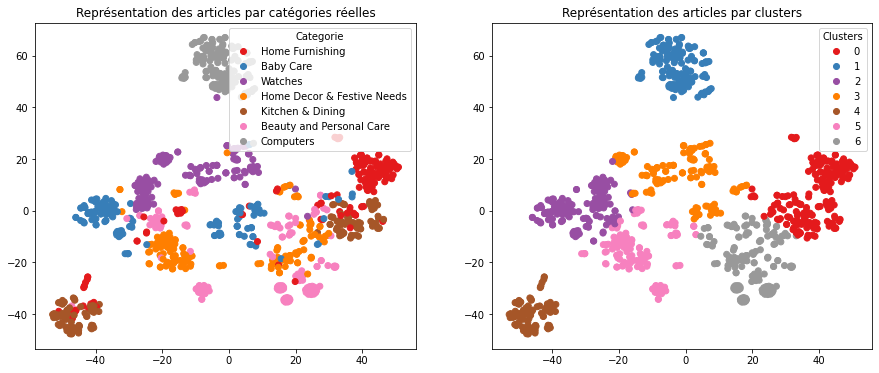

ARI :  0.4314


In [91]:
TSNE_visu_fct(X_tsne, data_text.category_code, labels, ARI)

# Classification de label
### A partir du tfidf et USE : meilleurs scores ARI

In [92]:
# tfidf / use
# utiliser leur extraction de feature
# classification de label => random forest

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

labels = data_text.category
print(features_USE.shape)
print(ctf_transform.shape)

(1050, 512)
(1050, 5324)


In [94]:
# USE

# diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features_USE, labels, test_size=0.2, random_state=42)

# initialiser le classifier SVM et random forest
clf = SVC(kernel='linear')
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# entraîner le classifier sur les données d'entraînement
clf.fit(X_train, y_train)
rf.fit(X_train, y_train)

# prédire les labels pour les données de test
y_pred = clf.predict(X_test)
y_pred_rf = rf.predict(X_test)

# calculer la précision du classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy SVC:", accuracy)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy Random Forest:", accuracy)

Accuracy SVC: 0.9333333333333333
Accuracy Random Forest: 0.9333333333333333


In [95]:
# Tfidf

# diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(ctf_transform, labels, test_size=0.2, random_state=42)

# initialiser le classifier SVM et random forest
clf = SVC(kernel='linear')
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# entraîner le classifier sur les données d'entraînement
clf.fit(X_train, y_train)
rf.fit(X_train, y_train)

# prédire les labels pour les données de test
y_pred = clf.predict(X_test)
y_pred_rf = rf.predict(X_test)

# calculer la précision du classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy SVC:", accuracy)

accuracy_rm = accuracy_score(y_test, y_pred_rf)
print("Accuracy Random Forest:", accuracy)

Accuracy SVC: 0.9523809523809523
Accuracy Random Forest: 0.9523809523809523


# Images

In [20]:
# un algorithme de type SIFT / ORB / SURF ;
# un algorithme de type CNN Transfer Learning (convolutional neural network) => keras

In [19]:
images = data_images.image
data_images

,image,category,category_code
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,4
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care,0
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,0
3,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,4
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,4
...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Baby Care,0
1046,fd6cbcc22efb6b761bd564c28928483c.jpg,Baby Care,0
1047,5912e037d12774bb73a2048f35a00009.jpg,Baby Care,0
1048,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Baby Care,0


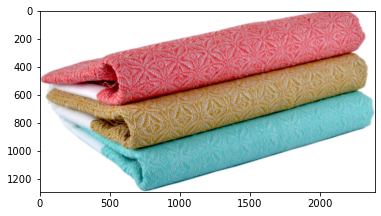

In [26]:
# afficher une image d'exemple
from matplotlib.image import imread
path = "../CSV-Excels/P6_datasets/Images/"
filename = path + "7b72c92c2f6c40268628ec5f14c6d590.jpg"
image = imread(filename)
plt.imshow(image)

## Détermination et affichage des descripteurs SIFT

* L'image originale contient 7k (montre) comme 47k (serviettes) descripteurs
* Il convient de réduire la résolution de l'image pour réduire le nombre de descripteurs et alléger les calculs 
* Chaque descripteur est un vecteur de longueur 128

Original Dimensions :  (1770, 1086)
Resized Dimensions :  (265, 162)


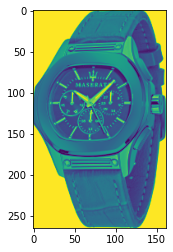

In [21]:
import cv2

sift = cv2.SIFT_create()
image = cv2.imread(path+images[5],0) # convert in gray

print('Original Dimensions : ',image.shape)
 
scale_percent = 15 # percent of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
 
# resize image
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
plt.imshow(resized)
plt.show()

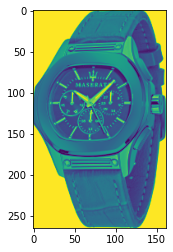

In [22]:
image = cv2.equalizeHist(resized)   # equalize image histogram
plt.imshow(resized)
plt.show()

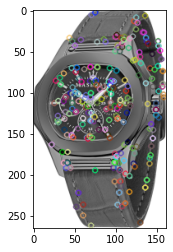

Descripteurs :  (269, 128)

[[ 15.   3.   0. ...   0.   0. 101.]
 [  7.  31.  58. ...  32.  11.   1.]
 [  3.   0.   0. ...  18.   2.   5.]
 ...
 [  0.   3.  13. ...   0.   0.   0.]
 [ 60.   0.   0. ...   0.   0.   0.]
 [  3.  41.  63. ...   0.   0.   0.]]


In [23]:
kp, des = sift.detectAndCompute(resized, None)
img=cv2.drawKeypoints(resized,kp,resized)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

# Pré-traitement des images via SIFT

## Créations des descripteurs de chaque image
* Pour chaque image passage en gris et equalisation
* création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [27]:
# identification des key points et descripteurs associés
sift_keypoints = []
temps1=time.time()
sift = cv2.SIFT_create(500)

for image_num in range(len(images)) :
    if image_num%50 == 0 : print(image_num)
    image = cv2.imread(path+images[image_num],0)
    scale_percent = 15
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
 
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    res = cv2.equalizeHist(resized)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000

Nombre de descripteurs :  (211321, 128)
temps de traitement SIFT descriptor :            49.58 secondes


/home/kilian/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


## Création des clusters de descripteurs
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [28]:
# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de", k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  460
Création de 460 clusters de descripteurs ...


/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


temps de traitement kmeans :             2.75 secondes


## Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

In [29]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             2.07 secondes


## Réductions de dimension

### Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [30]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 460)
Dimensions dataset après réduction PCA :  (1050, 389)


### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [31]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data_images["category"]
print(df_tsne.shape)

(1050, 3)


## Analyse visuelle : affichage T-SNE selon catégories d'images

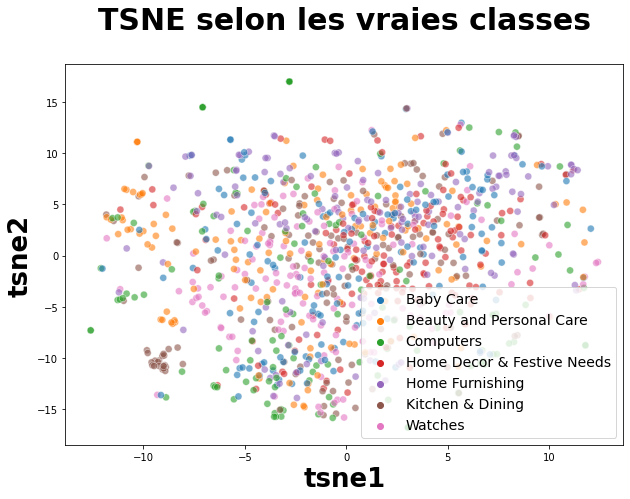

In [32]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [33]:
cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(1050, 4)


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters
* Le score ARI est très faible : 0.02

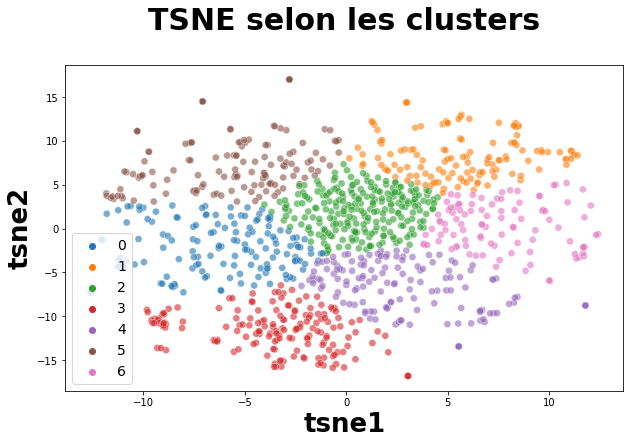

ARI :  0.027932066192015912


In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data_images["category_code"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

### Analyse par classes
* La matrice de confusion doit être transformée pour mettre avoir en colonne le même ordre des catégories supposées qu'en ligne

In [39]:
labels.value_counts()

4    150
0    150
6    150
3    150
5    150
1    150
2    150
Name: category_code, dtype: int64

In [35]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    145
1    129
2    236
3    167
4    139
5    136
6     98
Name: class, dtype: int64

In [36]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[17 26 33 25 20 16 13]
 [38 14 36 12 10 25 15]
 [19 11 14 43 29 27  7]
 [ 4 19 44 14 28 15 26]
 [ 8 37 40 15  8 29 13]
 [12 15 40 39 19 13 12]
 [47  7 29 19 25 11 12]]


In [43]:
import scipy.optimize

def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    # Créer une cost matrix
    cost_matrix = np.zeros_like(conf_mat, dtype=np.float32)
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            cost_matrix[i, j] = -conf_mat[i, j]
            
    # Trouver le meilleur matching avec le Hungarian algorithm
    row_ind, col_ind = scipy.optimize.linear_sum_assignment(cost_matrix)
    
    # Créer une liste correspondante des true labels
    corresp = [0] * len(set(y_pred))
    for i, j in zip(row_ind, col_ind):
        corresp[j] = i

    print ("Correspondance des clusters : ", corresp)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [6, 4, 5, 2, 0, 1, 3]
[[20 16 25 13 26 33 17]
 [10 25 12 15 14 36 38]
 [29 27 43  7 11 14 19]
 [28 15 14 26 19 44  4]
 [ 8 29 15 13 37 40  8]
 [19 13 39 12 15 40 12]
 [25 11 19 12  7 29 47]]

              precision    recall  f1-score   support

           0       0.14      0.13      0.14       150
           1       0.18      0.17      0.17       150
           2       0.26      0.29      0.27       150
           3       0.27      0.17      0.21       150
           4       0.29      0.25      0.27       150
           5       0.17      0.27      0.21       150
           6       0.32      0.31      0.32       150

    accuracy                           0.23      1050
   macro avg       0.23      0.23      0.23      1050
weighted avg       0.23      0.23      0.23      1050



In [61]:
data_images.loc[data_images.category_code ==2].category

47      Computers
51      Computers
53      Computers
54      Computers
55      Computers
          ...    
1028    Computers
1032    Computers
1034    Computers
1035    Computers
1036    Computers
Name: category, Length: 150, dtype: category
Categories (7, object): ['Baby Care', 'Beauty and Personal Care', 'Computers', 'Home Decor & Festive Needs', 'Home Furnishing', 'Kitchen & Dining', 'Watches']

<AxesSubplot:>

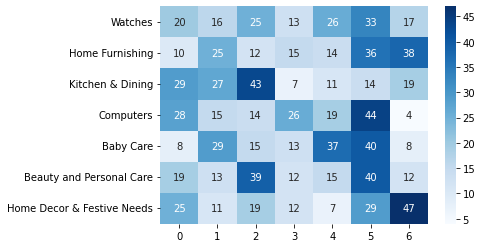

In [62]:
list_labels = [
    'Watches', 'Home Furnishing', 'Kitchen & Dining', 'Computers',
    'Baby Care', 'Beauty and Personal Care', 'Home Decor & Festive Needs'
]
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

On en conclue que le clustering n'est pas efficace, pour cause les raisons suivantes :
   - grosse réduction des images en terme de résolution
   - algorithme SIFT performe moyennement ?
   - nos features sont réduites par une PCA
   - puis TSNE sur la PCA

# Images partie 2 : CNN

In [20]:
# imports 
import os
from os import listdir
from sklearn.metrics import auc, roc_auc_score, roc_curve
from glob import glob

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout 
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

# os.environ["TF_KERAS"]='1'
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2023-03-23 10:51:32.294139: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 10:51:36.977470: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-23 10:51:36.977489: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-23 10:51:45.196399: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

Num GPUs Available:  0


2023-03-23 10:51:51.680585: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-23 10:51:51.686479: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-23 10:51:51.686515: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kilian-NP50DE-DB): /proc/driver/nvidia/version does not exist


## Création du modèle pré-entraîné

In [64]:
base_model = VGG16()
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

print(model.summary())

2023-03-17 10:17:47.695612: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## Création des features des images

In [65]:
images_features = []
i=0 
for image_file in images :
    if i%100 == 0 : print(i)
    i +=1
    image = load_img(path+image_file, target_size=(224, 224))
    image = img_to_array(image) 
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    images_features.append(model.predict(image, verbose=0)[0]) # predict from pretrained model

images_features = np.asarray(images_features)
images_features.shape

0
100
200
300
400
500
600


/home/kilian/anaconda3/lib/python3.9/site-packages/PIL/Image.py:2918: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


700
800
900
1000


(1050, 4096)

## Réduction dimension et analyse

### Réduction de dimension PCA

In [66]:
from sklearn import manifold, decomposition

print(images_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(images_features)
print(feat_pca.shape)

(1050, 4096)
(1050, 803)


### Réduction de dimension T-SNE et affichage des images selon vraies classes

In [67]:
from sklearn import manifold, decomposition

temps1 = time.time()

tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

duration1=time.time()-temps1
print("temps de T-SNE : ", "%15.2f" % duration1, "secondes")

temps de T-SNE :             3.54 secondes


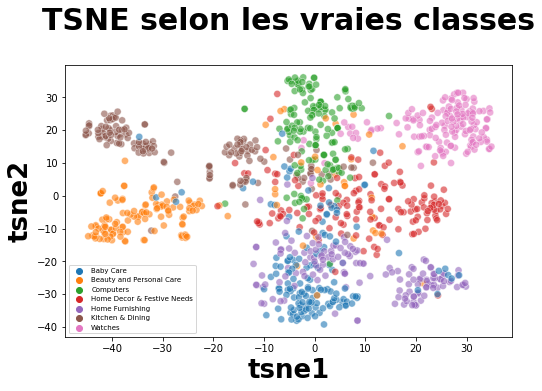

In [68]:
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne["class"] = data_images["category"]

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="class",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 7}, loc='lower left') 

plt.show()

* L'analyse graphique montre visuellement qu'il est réalisable de séparer automatiquement les images selon leurs vraies classes
* Ceci suffit à démontrer la faisabilité de réaliser ultérieurement une classification supervisée pour déterminer automatiquement les classes des images
* Cette étape 1 est très rapide à mettre en oeuvre. Une conclusion négative sur la faisabilité aurait éviter de réaliser des traitements beaucoup plus lourd de classification supervisée
* Cette démarche en 2 étapes (1. Faisabilité, 2. Classification supervisée si étape 1 OK) s'inscrit dans une démarche agile de tout projet Data

### Création de clusters à partir du T-SNE et affichage des images selon clusters
* Attention : ici, il ne s'agit pas de faire une classification non supervisée, mais simplement, par une mesure de l'ARI, de conforter l'analyse graphique précédente qui démontre la faisabilité de réaliser ultérieurement une classification supervisée. Cette mesure de l'ARI nécessite de créer des clusters théoriques via KMeans
* Il s'agit donc de réaliser une mesure de ce que nous voyons graphiquement, donc à partir des données en sortie du t-sne
* Pour réaliser une classification non supervisée, il aurait fallu repartir des données avant t-sne
* Dans la démarche en 2 étapes, il n'est pas utile de réaliser une classification non supervisée, une classification supervisée est bien plus performante. Même le calcul de l'ARI n'est pas indispensable, nous pourrions passer directement du graphique t-sne précédent à l'étape 2 de classification supervisée
* Il n'est donc pas utile de passer du temps à optimiser l'ARI, un ordre de grandeur suffit pour conforter le 1er graphique t-sne. D'ailleurs la meilleure solution de feature engineering ne génère pas toujours le meilleur ARI. L'analyse graphique t-sne est bien plus riche d'enseignement


In [69]:
kmeans = cluster.KMeans(n_clusters=7, n_init=100)
kmeans.fit(X_tsne)

KMeans(n_clusters=7, n_init=100)

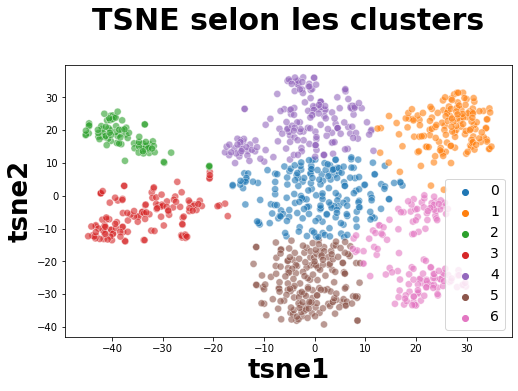

ARI :  0.4542572723523032


In [70]:
df_tsne["cluster"] = kmeans.labels_

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data_images["category_code"]
print("ARI : ", metrics.adjusted_rand_score(labels, kmeans.labels_))

In [71]:
# Analyse d'image "beauty and personal care" affectées au cluster 5 "Computers"

list_beauty_0 = [i for i in range(len(data_images["image"])) \
                if (data_images.iloc[i]['category']=='Beauty and Personal Care') and (df_tsne.iloc[i]['cluster']==5)]
list_beauty_0[0]

100

tsne1                      7.684614
tsne2                     24.748699
class      Beauty and Personal Care
cluster                           4
Name: 99, dtype: object


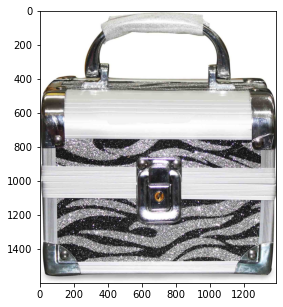

In [74]:
# Affichage image "Beauty and Personal Care" considérée comme "Computers"
# id = 100
id = 99
print(df_tsne.iloc[id])
fig = plt.figure(figsize = (8, 5))
# plt.subplot(130 + 1 + i)
filename = data_images["image"][id]
image = imread(path+filename)
plt.imshow(image)
plt.show()

* Analyse : le modèle pré-entraîné confond "Computer" avec une valise de maquillage ...

### Analyse par classes

In [75]:
conf_mat = metrics.confusion_matrix(labels, kmeans.labels_)
print(conf_mat)

[[ 28   0   1   3   2 108   8]
 [ 14   1   1 117   9   3   5]
 [ 34   1   0   1 113   1   0]
 [ 80   8   0   1   5   2  54]
 [  8   0   0   0   0  70  72]
 [ 29   0  81   7  33   0   0]
 [  2 135   0   0  13   0   0]]


In [83]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

In [77]:
kmeans_labels_transform = conf_mat_transform(labels, kmeans.labels_)
conf_mat = metrics.confusion_matrix(labels, kmeans_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, kmeans_labels_transform))

Correspondance des clusters :  [3 6 5 1 2 0 4]
[[108   3   2  28   8   1   0]
 [  3 117   9  14   5   1   1]
 [  1   1 113  34   0   0   1]
 [  2   1   5  80  54   0   8]
 [ 70   0   0   8  72   0   0]
 [  0   7  33  29   0  81   0]
 [  0   0  13   2   0   0 135]]

              precision    recall  f1-score   support

           0       0.59      0.72      0.65       150
           1       0.91      0.78      0.84       150
           2       0.65      0.75      0.70       150
           3       0.41      0.53      0.46       150
           4       0.52      0.48      0.50       150
           5       0.98      0.54      0.70       150
           6       0.93      0.90      0.92       150

    accuracy                           0.67      1050
   macro avg       0.71      0.67      0.68      1050
weighted avg       0.71      0.67      0.68      1050



<AxesSubplot:>

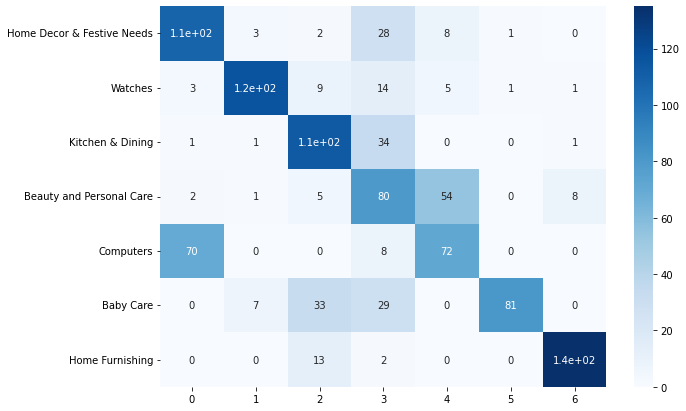

In [81]:
list_labels_cnn = [
    'Home Decor & Festive Needs', 'Watches', 'Kitchen & Dining', 'Beauty and Personal Care',
    'Computers', 'Baby Care', 'Home Furnishing'
]
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels_cnn],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="Blues")

* Les classes les moins bien prédites sont baby care, computers, et beauty and personal care

# Etape 2 : classification supervisée
4 approches sont présentées :
* Une approche simple par préparation initiale de l'ensemble des images avant classification supervisée
* Une approche par data generator, permettant facilement la data augmentation. Les images sont directement récupérées à la volée dans le repertoire des images
* Une approche récente proposée par Tensorflow.org par DataSet, sans data augmentation
* Une approche par  DataSet, avec data augmentation intégrée au modèle : layer en début de modèle

## Création du modèle de classification

In [21]:
def create_model_fct() :
    # Récupération modèle pré-entraîné
    model0 = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

    # Layer non entraînables = on garde les poids du modèle pré-entraîné
    for layer in model0.layers:
        layer.trainable = False

    # Récupérer la sortie de ce réseau
    x = model0.output
    # Compléter le modèle
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)

    # Définir le nouveau modèle
    model = Model(inputs=model0.input, outputs=predictions)
    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

    print(model.summary())
    
    return model

## Approche préparation initiale des images

In [74]:
from sklearn.model_selection import train_test_split

# X_train, X_temp, y_train, y_temp = train_test_split(X, y, stratify=y, test_size=0.4, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify=y_temp, test_size=0.5, random_state=42)

# print(X_train.shape)
# print(X_val.shape)
# print(X_test.shape)

In [67]:
# Pour mélanger les images, classées initalement par classe, et créer un dataframe de test
data = data_images.sample(frac=1, random_state=42)
data_test = data.sample(n=250)
data.drop(data_test.index, inplace=True)
data.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)
print(data.shape)
print(data_test.shape)

(800, 3)
(250, 3)


In [69]:
def image_prep_fct(data) :
    prepared_images = []
    for image_num in range(len(data['image'])) :
# #         print(path + data['image'][image_num])
#         print(data['image'])
        img = (load_img(
            path + data['image'][image_num],
            target_size=(224, 224)))
        img = img_to_array(img)
        img = img.reshape((img.shape[0], img.shape[1], img.shape[2]))
        img = preprocess_input(img)
        prepared_images.append(img)
        prepared_images_np = np.array(prepared_images)
    return prepared_images_np
    
images_np = image_prep_fct(data)
print(images_np.shape)
images_np_test = image_prep_fct(data_test)
print(images_np_test.shape)

(800, 224, 224, 3)


/home/kilian/anaconda3/lib/python3.9/site-packages/PIL/Image.py:2918: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


(250, 224, 224, 3)


In [70]:
X = images_np
y = to_categorical(data['category_code'])

X_test = images_np_test
y_test = to_categorical(data_test['category_code'])

In [75]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)
X_train.shape

(600, 224, 224, 3)

In [71]:
# Création du modèle
with tf.device('/gpu:0'): 
    model1 = create_model_fct()

# Création du callback
model1_save_path1 = "./model1_best_weights.h5"
checkpoint = ModelCheckpoint(model1_save_path1, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

2023-03-23 11:37:05.470654: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [76]:
# Très long temps de calcul
# Entraîner sur les données d'entraînement (X_train, y_train)
with tf.device('/gpu:0'): 
    history1 = model1.fit(X_train, y_train, epochs=50, batch_size=64, 
                       callbacks=callbacks_list, validation_data=(X_val, y_val), verbose=1)

Epoch 1/50


2023-03-23 11:40:02.730991: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 822083584 exceeds 10% of free system memory.
2023-03-23 11:40:03.184865: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 822083584 exceeds 10% of free system memory.


 1/10 [==>...........................] - ETA: 47s - loss: 13.7704 - accuracy: 0.1562

2023-03-23 11:40:06.964453: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 822083584 exceeds 10% of free system memory.
2023-03-23 11:40:07.144648: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 822083584 exceeds 10% of free system memory.


 2/10 [=====>........................] - ETA: 29s - loss: 11.5930 - accuracy: 0.1797

2023-03-23 11:40:10.702740: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 822083584 exceeds 10% of free system memory.


10/10 [==============================] - ETA: 0s - loss: 6.0534 - accuracy: 0.4317
Epoch 1: val_loss improved from inf to 2.18682, saving model to ./model1_best_weights.h5
10/10 [==============================] - 52s 5s/step - loss: 6.0534 - accuracy: 0.4317 - val_loss: 2.1868 - val_accuracy: 0.7150
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 2.5517 - accuracy: 0.6417
Epoch 2: val_loss improved from 2.18682 to 1.59192, saving model to ./model1_best_weights.h5
10/10 [==============================] - 54s 6s/step - loss: 2.5517 - accuracy: 0.6417 - val_loss: 1.5919 - val_accuracy: 0.7100
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 1.7214 - accuracy: 0.7133
Epoch 3: val_loss improved from 1.59192 to 1.52703, saving model to ./model1_best_weights.h5
10/10 [==============================] - 53s 5s/step - loss: 1.7214 - accuracy: 0.7133 - val_loss: 1.5270 - val_accuracy: 0.7400
Epoch 4/50
10/10 [==============================] - ETA: 0s - loss:

In [77]:
# Score du dernier epoch

loss, accuracy = model1.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print()
loss, accuracy = model1.evaluate(X_val, y_val, verbose=True)
print("Validation Accuracy:  {:.4f}".format(accuracy))

19/19 [==============================] - 38s 2s/step - loss: 0.0046 - accuracy: 1.0000
Training Accuracy: 1.0000

7/7 [==============================] - 14s 2s/step - loss: 1.2058 - accuracy: 0.7850
Validation Accuracy:  0.7850


In [78]:
# Score de l'epoch optimal

model1.load_weights(model1_save_path1)

loss, accuracy = model1.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model1.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model1.evaluate(X_test, y_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))

Training Accuracy :  0.9917
Validation Accuracy :  0.7850
Test Accuracy       :  0.8560


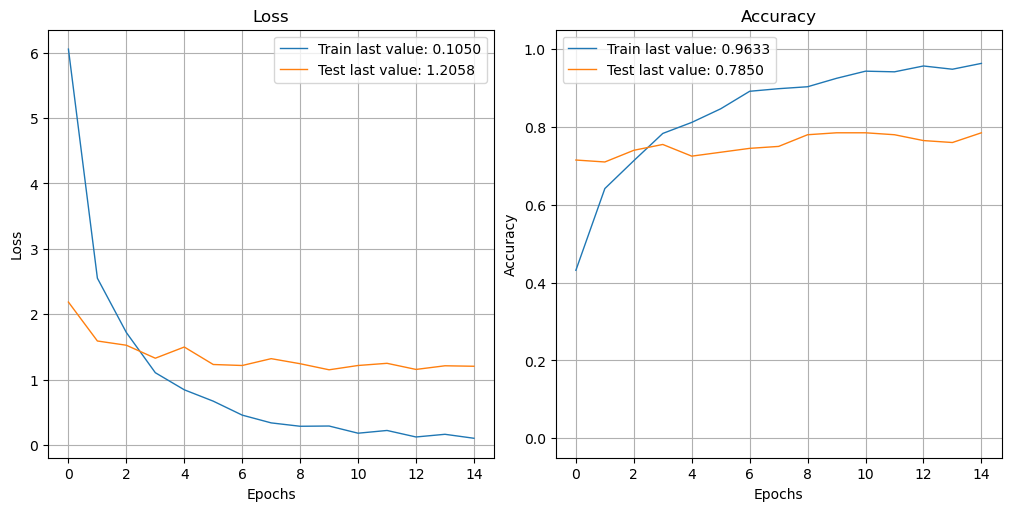

In [79]:
from plot_keras_history import show_history, plot_history

show_history(history1)
plot_history(history1, path="standard.png")
plt.close()

In [80]:
y_val_num = np.argmax(y_val, axis=1)
y_val_pred = np.argmax(model1.predict(X_val), axis=1)
y_val_num = np.argmax(y_val, axis=1)
print(y_val_num)
print()
print(y_val_pred)

7/7 [==============================] - 11s 2s/step
[4 4 6 3 1 5 4 6 6 6 5 3 5 0 6 0 2 1 5 1 1 3 2 3 0 3 5 2 3 6 1 5 2 2 5 3 0
 2 3 3 0 4 4 1 5 3 0 4 6 1 2 5 3 5 3 4 5 6 2 6 0 4 4 2 6 2 5 2 5 1 6 1 0 0
 5 4 3 4 3 6 2 4 1 0 4 5 4 3 1 0 3 3 0 0 4 1 5 0 5 1 1 2 2 4 1 0 1 6 0 3 4
 6 4 1 0 5 0 3 2 4 2 0 2 1 2 2 2 0 5 5 1 2 3 6 6 5 0 2 1 0 2 3 6 2 6 5 1 5
 2 3 5 3 1 1 0 3 1 2 4 0 4 2 2 6 2 4 6 2 3 0 1 1 6 6 5 0 6 3 1 4 1 0 3 6 2
 4 1 6 4 4 4 6 5 5 4 4 6 0 5 0]

[4 4 6 3 3 5 4 2 6 6 5 3 0 5 6 4 2 1 5 3 1 3 2 2 0 3 5 2 3 6 0 5 6 2 5 3 4
 2 3 5 0 4 0 1 5 5 3 4 2 1 2 5 3 5 3 4 5 6 2 6 0 0 4 2 6 2 4 2 5 4 6 1 0 0
 2 4 3 4 3 6 2 4 1 0 4 5 4 3 1 0 0 3 0 0 4 5 5 0 5 1 1 2 2 5 3 0 1 6 0 3 0
 6 4 2 0 5 2 3 2 4 2 0 2 1 2 2 2 0 5 2 3 2 3 6 6 5 0 2 1 4 3 2 6 2 6 5 1 5
 2 3 5 3 2 2 0 3 1 2 4 0 4 2 2 6 4 4 6 2 5 4 1 1 6 6 5 4 2 3 1 4 1 0 5 6 2
 4 1 5 4 3 0 6 5 5 4 4 6 3 5 0]


In [81]:
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred)
print(conf_mat)

[[20  0  1  2  5  1  0]
 [ 1 19  3  4  1  1  0]
 [ 0  0 28  1  1  0  1]
 [ 1  0  2 20  0  4  0]
 [ 4  0  0  1 23  1  0]
 [ 1  0  2  0  1 24  0]
 [ 0  0  3  0  0  1 23]]


In [84]:
y_val_pred_transform = conf_mat_transform(y_val_num, y_val_pred)
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_val_num, y_val_pred_transform))

Correspondance des clusters :  [0 1 2 3 4 5 6]
[[20  0  1  2  5  1  0]
 [ 1 19  3  4  1  1  0]
 [ 0  0 28  1  1  0  1]
 [ 1  0  2 20  0  4  0]
 [ 4  0  0  1 23  1  0]
 [ 1  0  2  0  1 24  0]
 [ 0  0  3  0  0  1 23]]

              precision    recall  f1-score   support

           0       0.74      0.69      0.71        29
           1       1.00      0.66      0.79        29
           2       0.72      0.90      0.80        31
           3       0.71      0.74      0.73        27
           4       0.74      0.79      0.77        29
           5       0.75      0.86      0.80        28
           6       0.96      0.85      0.90        27

    accuracy                           0.79       200
   macro avg       0.80      0.78      0.79       200
weighted avg       0.80      0.79      0.79       200



<AxesSubplot:>

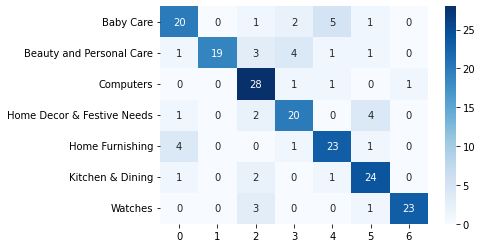

In [85]:
labels_ordered = ['Baby Care', 'Beauty and Personal Care', 'Computers', 'Home Decor & Festive Needs',
                  'Home Furnishing', 'Kitchen & Dining', 'Watches']
df_cm = pd.DataFrame(conf_mat, index = [label for label in labels_ordered],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

L'ensemble des images sont bien classées, éventuellement home furnishing confondu avec baby care

## Approche ImageDatagenerator avec data augmentation

CF https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow (noté désormais comme "deprecated", incite à utiiser l'approche suivante)

In [86]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [88]:
batch_size = 32

def data_flow_fct(data, datagen, data_type=None) :
    data_flow = datagen.flow_from_dataframe(data, directory=path,
                                x_col='image', y_col='category',
                                weight_col=None, target_size=(256, 256),
                                classes=None, class_mode='categorical',
                                batch_size=batch_size, shuffle=True, seed=42,
                                subset=data_type
                                )
    return data_flow

In [89]:
datagen_train = ImageDataGenerator(
#    featurewise_center=True,
#    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.25,
    preprocessing_function=preprocess_input)

train_flow = data_flow_fct(data, datagen_train, data_type='training')
val_flow = data_flow_fct(data, datagen_train, data_type='validation')

datagen_test = ImageDataGenerator(
    validation_split=0,
    preprocessing_function=preprocess_input)

test_flow = data_flow_fct(data_test, datagen_test, data_type=None)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
# datagen.fit(X_train)
# fits the model on batches with real-time data augmentation:

Found 600 validated image filenames belonging to 7 classes.
Found 200 validated image filenames belonging to 7 classes.
Found 250 validated image filenames belonging to 7 classes.


In [90]:
# Création du modèle
with tf.device('/gpu:0'): 
    model2 = create_model_fct()

# Création du callback
model2_save_path = "./model2_best_weights.h5"
checkpoint = ModelCheckpoint(model2_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [91]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [92]:
with tf.device('/gpu:0'): 
    history2 = model2.fit(train_flow,
                    validation_data=val_flow,
                    batch_size=batch_size, epochs=50, callbacks=callbacks_list, verbose=1)

Epoch 1/50
19/19 [==============================] - ETA: 0s - loss: 4.1336 - accuracy: 0.4367
Epoch 1: val_loss improved from inf to 1.50772, saving model to ./model2_best_weights.h5
19/19 [==============================] - 77s 4s/step - loss: 4.1336 - accuracy: 0.4367 - val_loss: 1.5077 - val_accuracy: 0.6700
Epoch 2/50
19/19 [==============================] - ETA: 0s - loss: 1.5930 - accuracy: 0.6583
Epoch 2: val_loss improved from 1.50772 to 1.00674, saving model to ./model2_best_weights.h5
19/19 [==============================] - 77s 4s/step - loss: 1.5930 - accuracy: 0.6583 - val_loss: 1.0067 - val_accuracy: 0.7450
Epoch 3/50
19/19 [==============================] - ETA: 0s - loss: 1.0489 - accuracy: 0.7333
Epoch 3: val_loss improved from 1.00674 to 0.89588, saving model to ./model2_best_weights.h5
19/19 [==============================] - 77s 4s/step - loss: 1.0489 - accuracy: 0.7333 - val_loss: 0.8959 - val_accuracy: 0.7450
Epoch 4/50
19/19 [==============================] - ETA:

In [93]:
# Score du dernier epoch

loss, accuracy = model2.evaluate(train_flow, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model2.evaluate(val_flow, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

19/19 [==============================] - 56s 3s/step - loss: 0.0723 - accuracy: 0.9850
Training Accuracy   : 0.9850

7/7 [==============================] - 17s 2s/step - loss: 0.9468 - accuracy: 0.8250
Validation Accuracy :  0.8250


In [94]:
# Score de l'epoch optimal

model2.load_weights(model2_save_path)

loss, accuracy = model2.evaluate(val_flow, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model2.evaluate(test_flow, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))

Validation Accuracy :  0.7500


/home/kilian/anaconda3/lib/python3.9/site-packages/PIL/Image.py:2918: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Test Accuracy       :  0.8560


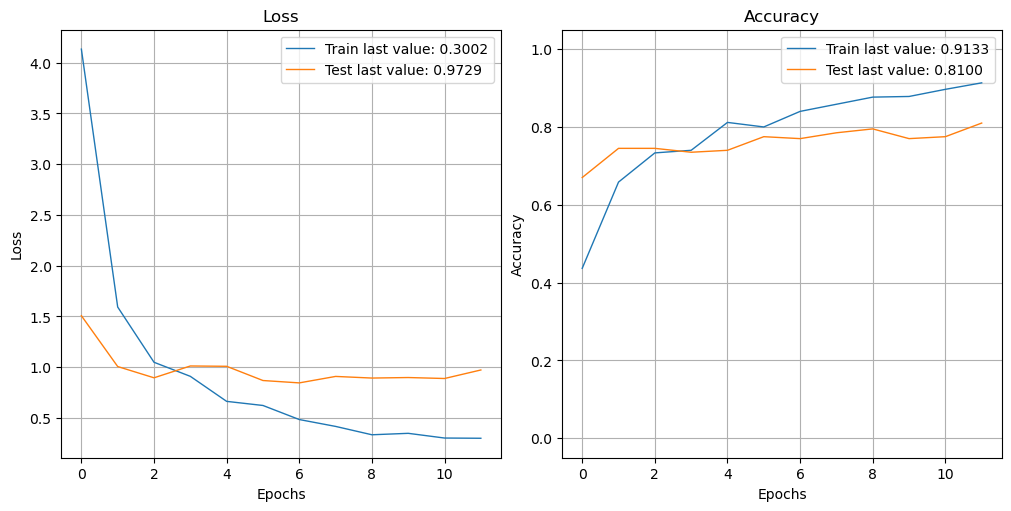

In [95]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history2)
plot_history(history2, path="standard.png")
plt.close()

## Approche nouvelle par Dataset sans data augmentation

CF https://www.tensorflow.org/tutorials/load_data/images

In [96]:
# batch_size = 32

# def dataset_fct(path, validation_split=0, data_type=None) :
#     dataset = tf.keras.utils.image_dataset_from_directory(
#                     path, labels='inferred', label_mode='categorical',
#                     class_names=None, batch_size=32, image_size=(224, 224), shuffle=True, seed=42,
#                     validation_split=validation_split, subset=data_type
#                     )
#     return dataset

# faire la même function avec de la data augmentation à 0

In [160]:
# dataset_train = dataset_fct(path, validation_split=0.25, data_type='training')
# dataset_val = dataset_fct(path, validation_split=0.25, data_type='validation')
# dataset_test = dataset_fct(path_test, validation_split=0, data_type=None)

Found 0 files belonging to 0 classes.
Using 0 files for training.


ValueError: No images found in directory ../CSV-Excels/P6_datasets/Images/. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [97]:
datagen_train = ImageDataGenerator(
    validation_split=0.25,
    preprocessing_function=preprocess_input)

dataset_train = data_flow_fct(data, datagen_train, data_type='training')
dataset_val = data_flow_fct(data, datagen_train, data_type='validation')

datagen_test = ImageDataGenerator(
    validation_split=0,
    preprocessing_function=preprocess_input)

dataset_test = data_flow_fct(data_test, datagen_test, data_type=None)

Found 600 validated image filenames belonging to 7 classes.
Found 200 validated image filenames belonging to 7 classes.
Found 250 validated image filenames belonging to 7 classes.


In [98]:
# Création du modèle
with tf.device('/gpu:0'): 
    model3 = create_model_fct()

# Création du callback
model3_save_path = "./model3_best_weights.h5"
checkpoint = ModelCheckpoint(model3_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [99]:
with tf.device('/gpu:0'): 
    history3 = model3.fit(dataset_train,
                    validation_data=dataset_val,
                    batch_size=batch_size, epochs=50, callbacks=callbacks_list, verbose=1)


Epoch 1/50
19/19 [==============================] - ETA: 0s - loss: 5.1330 - accuracy: 0.4683
Epoch 1: val_loss improved from inf to 1.66230, saving model to ./model3_best_weights.h5
19/19 [==============================] - 75s 4s/step - loss: 5.1330 - accuracy: 0.4683 - val_loss: 1.6623 - val_accuracy: 0.6700
Epoch 2/50
19/19 [==============================] - ETA: 0s - loss: 1.9720 - accuracy: 0.6517
Epoch 2: val_loss improved from 1.66230 to 1.36002, saving model to ./model3_best_weights.h5
19/19 [==============================] - 74s 4s/step - loss: 1.9720 - accuracy: 0.6517 - val_loss: 1.3600 - val_accuracy: 0.7750
Epoch 3/50
19/19 [==============================] - ETA: 0s - loss: 0.9741 - accuracy: 0.7733
Epoch 3: val_loss improved from 1.36002 to 1.13214, saving model to ./model3_best_weights.h5
19/19 [==============================] - 75s 4s/step - loss: 0.9741 - accuracy: 0.7733 - val_loss: 1.1321 - val_accuracy: 0.7900
Epoch 4/50
19/19 [==============================] - ETA:

In [100]:
# Score du dernier epoch

loss, accuracy = model3.evaluate(dataset_train, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model3.evaluate(dataset_val, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

19/19 [==============================] - 56s 3s/step - loss: 0.0160 - accuracy: 0.9967
Training Accuracy   : 0.9967

7/7 [==============================] - 19s 3s/step - loss: 1.2917 - accuracy: 0.8200
Validation Accuracy :  0.8200


In [101]:
# Score de l'epoch optimal

model3.load_weights(model3_save_path)

loss, accuracy = model3.evaluate(dataset_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model3.evaluate(dataset_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))


Validation Accuracy :  0.8150


/home/kilian/anaconda3/lib/python3.9/site-packages/PIL/Image.py:2918: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Test Accuracy       :  0.8360


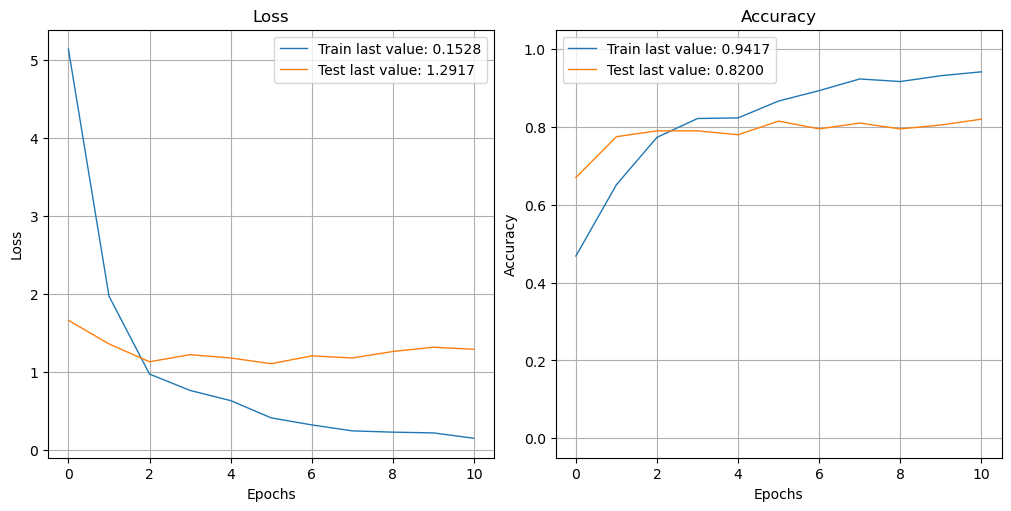

In [102]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history3)
plot_history(history3, path="standard.png")
plt.close()

## Approche nouvelle par Dataset avec data augmentation intégrée au modèle

CF https://www.tensorflow.org/tutorials/images/data_augmentation

In [108]:
batch_size = 25

# def dataset_fct(path, validation_split=0, data_type=None) :
#     dataset = tf.keras.utils.image_dataset_from_directory(
#                     path, labels='inferred', label_mode='categorical',
#                     class_names=None, batch_size=batch_size, image_size=(224, 224), shuffle=True, seed=42,
#                     validation_split=validation_split, subset=data_type
#                     )
#     return dataset

In [ ]:
# dataset_train = dataset_fct(path, validation_split=0.25, data_type='training')
# dataset_val = dataset_fct(path, validation_split=0.25, data_type='validation')
# dataset_test = dataset_fct(path_test, validation_split=0, data_type=None)

In [109]:
datagen_train = ImageDataGenerator(
    validation_split=0.25,
    preprocessing_function=preprocess_input)

dataset_train = data_flow_fct(data, datagen_train, data_type='training')
dataset_val = data_flow_fct(data, datagen_train, data_type='validation')

datagen_test = ImageDataGenerator(
    validation_split=0,
    preprocessing_function=preprocess_input)

dataset_test = data_flow_fct(data_test, datagen_test, data_type=None)

Found 600 validated image filenames belonging to 7 classes.
Found 200 validated image filenames belonging to 7 classes.
Found 250 validated image filenames belonging to 7 classes.


In [ ]:
# def resize_and_rescale(image, label):
#     image = tf.cast(image, tf.float32)
#     image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
#     image = (image / 255.0)
#     return image, label

In [124]:
def create_model_fct2() :
    # Data augmentation
    data_augmentation = Sequential([
        RandomFlip("horizontal", input_shape=(256, 256, 3)),
        RandomRotation(0.1),
        RandomZoom(0.1),
        # Rescaling(1./127.5, offset=-1.0)
      ])
    
    # Récupération modèle pré-entraîné
    model_base = VGG16(include_top=False, weights="imagenet", input_shape=(256, 256, 3))
    for layer in model_base.layers:
        layer.trainable = False

    # Définition du nouveau modèle
    model = Sequential([
                data_augmentation,
                Rescaling(1./127.5, offset=-1),
                model_base,
                GlobalAveragePooling2D(),
                Dense(256, activation='relu'),
                Dropout(0.5),
                Dense(7, activation='softmax')
                ])

    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

    print(model.summary())
    
    return model
    

In [125]:
# Création du modèle
with tf.device('/gpu:0'): 
    model4 = create_model_fct2()

# Création du callback
model4_save_path = "./model4_best_weights.h5"
checkpoint = ModelCheckpoint(model4_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

# Specified a list with shape [224,224,3] from a tensor with shape [256,256,3]

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_12 (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 global_average_pooling2d_9   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                     

In [126]:
with tf.device('/gpu:0'): 
    history4 = model4.fit(dataset_train,
                    validation_data=dataset_val,
                    batch_size=batch_size, epochs=50, callbacks=callbacks_list, verbose=1)


Epoch 1/50
24/24 [==============================] - ETA: 0s - loss: 1.8506 - accuracy: 0.2617
Epoch 1: val_loss improved from inf to 1.45057, saving model to ./model4_best_weights.h5
24/24 [==============================] - 75s 3s/step - loss: 1.8506 - accuracy: 0.2617 - val_loss: 1.4506 - val_accuracy: 0.6500
Epoch 2/50
24/24 [==============================] - ETA: 0s - loss: 1.3846 - accuracy: 0.5383
Epoch 2: val_loss improved from 1.45057 to 1.07427, saving model to ./model4_best_weights.h5
24/24 [==============================] - 73s 3s/step - loss: 1.3846 - accuracy: 0.5383 - val_loss: 1.0743 - val_accuracy: 0.7250
Epoch 3/50
24/24 [==============================] - ETA: 0s - loss: 1.1356 - accuracy: 0.6450
Epoch 3: val_loss improved from 1.07427 to 0.89836, saving model to ./model4_best_weights.h5
24/24 [==============================] - 74s 3s/step - loss: 1.1356 - accuracy: 0.6450 - val_loss: 0.8984 - val_accuracy: 0.7550
Epoch 4/50
24/24 [==============================] - ETA:

In [127]:
# Score du dernier epoch

loss, accuracy = model4.evaluate(dataset_train, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model4.evaluate(dataset_val, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

24/24 [==============================] - 52s 2s/step - loss: 0.3432 - accuracy: 0.9017
Training Accuracy   : 0.9017

8/8 [==============================] - 19s 2s/step - loss: 0.5872 - accuracy: 0.8150
Validation Accuracy :  0.8150


In [128]:
# Score de l'epoch optimal

model4.load_weights(model4_save_path)

loss, accuracy = model4.evaluate(dataset_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model4.evaluate(dataset_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))

Validation Accuracy :  0.8350


/home/kilian/anaconda3/lib/python3.9/site-packages/PIL/Image.py:2918: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Test Accuracy       :  0.8000


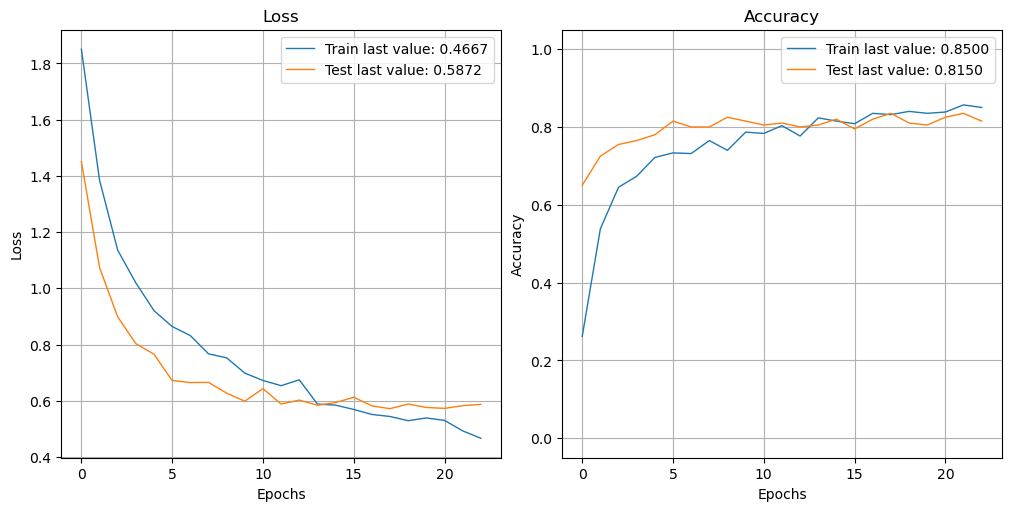

In [129]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history4)
plot_history(history4, path="standard.png")
plt.close()